In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#uncomment and run the above lines if you do not have those packages installed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
dataset = pd.read_csv('gun-violence-data.csv')

In [3]:
dataset.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [4]:
dataset

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [5]:
dataset = dataset.dropna()

In [6]:
dataset = dataset.drop(columns = ['incident_url', 'source_url', 'sources'])
#not useful columns

In [7]:
dataset

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,False,22.0,0::Unknown,...,"4 victims in Mohawk, 2 more in Herkimer- Gaffe...",0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,101.0,51.0
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,False,2.0,0::Unknown,...,ms; 2 dead; 2 wounded. Pharmacy robbery by ex ...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,35.0,8.0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,False,5.0,0::Unknown,...,dv; 4 inj; non life-threatening injuries. Perp...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,51.0,19.0
181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,False,3.0,0::Unknown||1::Unknown||2::Unknown,...,Suspect had either been fired or had retired a...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,19.0,5.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,False,3.0,0::Unknown,...,"Sources said the ""Brick Squad"" gang faction, a...",0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,1.0
6075,106101,2014-02-12,Tennessee,Jackson,1050 Union University Dr,1,0,False,8.0,0::Unknown,...,"Union University;\r\r\r\r\n35.678008, -88.862814",0::21||1::22,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Olivia Greenlee||1::Charles Pittman,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,73.0,27.0
8564,113439,2014-03-09,Tennessee,Memphis,2174 Westchester Dr,1,0,False,9.0,0:Unknown,...,man who advertised his car on Craigslist shot ...,0:37|1:17|2:17|3:21,0:Adult 18+|1:Teen 12-17|2:Teen 12-17|3:Adult 18+,0:Male|1:Male|2:Male|3:Male,0:Larry Wilkins|1:Martiness Henderson|2:Walter...,1:Armed Robbery|2:Armed Robbery|3:Armed Robbery,"0:Killed|1:Unharmed, Arrested|2:Unharmed, Arre...",0:Victim|1:Subject-Suspect|2:Subject-Suspect|3...,97.0,30.0
8897,114096,2014-03-11,Missouri,Ballwin (Wildwood),800 Guy Park Dr,2,0,False,2.0,0:Unknown,...,father shot son,0:20|1:57,0:Adult 18+|1:Adult 18+,0:Male|1:Male,0:Joseph Potter|1:Douglas Potter,1:Family,0:Killed|1:Killed,0:Victim|1:Subject-Suspect,100.0,15.0
9129,114929,2014-03-14,Florida,Daytona Beach,801 Dr. Mary McLeod Bethune Blvd.,1,1,False,6.0,0:Unknown,...,"Picture Perfect Hair & Nails, prior dispute, e...",0:21|1:35|2:25,0:Adult 18+|1:Adult 18+|2:Adult 18+,0:Male|1:Female|2:Male,0:Quordre Wiley|1:Sahneta Malcolm|2:Deandre Pe...,2

$\textbf{HISTOGRAM}$

In [8]:
#a 50 bar bar plot would seem to be non-optimal. Instead, let's create a plot that visualizes this data effectively.

Text(0.5, 1.0, 'A histogram of the state-level distribution of number of people killed by guns')

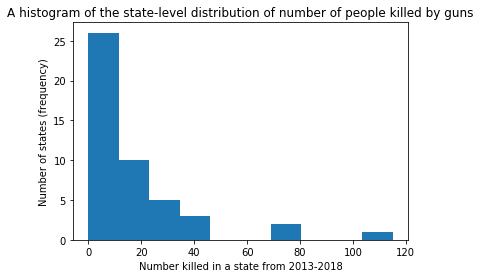

In [9]:
state_grouping = dataset.groupby('state').agg({'n_killed': sum})
#state_grouping.head()
states = dataset['state'].unique()
killed = state_grouping['n_killed']
plt.hist(killed)
#sns.distplot(killed)
#seaborn implementation of the same histogram
plt.ylabel('Number of states (frequency)')
plt.xlabel('Number killed in a state from 2013-2018')
plt.title('A histogram of the state-level distribution of number of people killed by guns')

In [10]:
#what does this histogram show? How did it transform the data from the bar plot above?

$\textbf{BAR PLOT}$

In [11]:
#Let's say that we wanted to plot the number of gun deaths per year in California.

In [12]:
#What plot do you think will best accomplish this?

In [13]:
california = dataset[dataset['state'] == 'California']
california

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
47617,225048,2014-11-25,California,Oakland,Skyline and Pinehurst,1,0,False,11.0,0::Unknown,...,at Huckleberry Botanic Regional Preserve;\r\r\...,0::60,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Male||1::Male||2::Male,0::David Robert Ruenzel,1::Armed Robbery||2::Armed Robbery,0::Killed||1::Unharmed||2::Unharmed,0::Victim||1::Subject-Suspect||2::Subject-Suspect,16.0,7.0
49097,260343,2014-12-08,California,Los Angeles,340 Hauser Blvd,2,0,False,33.0,0::Unknown,...,"Male is rapper, female is dancer with VH1 Hit ...",0::30||1::34,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Stephanie Elyse Moseley||1::Earl Warren Hayes,1::Family,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,50.0,26.0
62643,895498,2015-03-26,California,Los Angeles,1025 106th St,2,0,False,43.0,0::Unknown,...,Subj killed his gf then shot at ofc but missed...,0::32||1::28,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Lakeisha Lynall||1::Victor Daniel Terrazas,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,62.0,30.0
81855,382543,2015-07-27,California,Rosemead,8711 Valley Blvd,1,0,False,27.0,0::Unknown,...,Mother kills son,0::17||1::49,0::Teen 12-17||1::Adult 18+,0::Male||1::Female,0::George Hang||1::Lai Hang,1::Family,0::Killed||1::Arrested,0::Victim||1::Subject-Suspect,49.0,22.0
107810,485647,2016-01-14,California,San Leandro,15555 East 14th Street,0,0,False,13.0,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,...,Shots fired in mall parking lot. Two people ta...,0::22||1::29,0::Adult 18+||1::Adult 18+||2::Teen 12-17,0::Male||1::Male||2::Male,0::James Williams||1::Andre Winn,0::Gang vs Gang||1::Gang vs Gang||2::Gang vs Gang,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,18.0,10.0
110750,500660,2016-02-04,California,Burbank,2701 Thornton Ave,0,1,False,28.0,0::Unknown,...,Gun used recovered following execution of sear...,0::21||1::19||2::22,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Male||1::Male||2::Female,1::Erik Manooki||2::Candice Richardson,1::Gang vs Gang||2::Gang vs Gang,"0::Injured||1::Unharmed, Arrested||2::Unharmed...",0::Victim||1::Subject-Suspect||2::Subject-Suspect,43.0,25.0
120565,538343,2016-04-10,California,Los Angeles (Boyle Heights),1400 block of Gabriel Garcia Marquez Street,1,0,False,34.0,0::Unknown,...,armed with knife,0::27,0::Adult 18+,0::Male,0::Arturo Yobani-Torrez Valdez,0::Home Invasion - Perp Does Not Know Victim,0::Killed,0::Subject-Suspect,53.0,24.0
134582,598281,2016-07-08,California,Sacramento,4400 block of Florin Road,0,2,False,6.0,0::Unknown||1::Unknown,...,susp convicted after a shootout that led to in...,1::45,0::Adult 18+||1::Adult 18+,0::Male||1::Male,1::Gilbert Earl Smith,1::Armed Robbery,"0::Injured||1::Injured, Arrested",0::Victim||1::Subject-Suspect,9.0,6.0
134984,601923,2016-07-11,California,Stockton,6732 East Waterloo Road,1,0,False,9.0,0::Unknown,...,"CA-88, owner shot during ar, on birthday, by s...",0::63,0::Adult 18+,0::Male||1::Male,0::Anwar Badruddin Machiwalla,1::Armed Robbery,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,12.0,5.0
146675,657184,2016-09-16,California,Bakersfield,2340 Niles Street,0,1,False,23.0,0::Unknown||1::Unknown,...,"attempt to rob marijuana dispensary, shots exc...",1::24,1::Adult 18+,1::Male,1::Robert Charles Williams,1::Armed Robbery,1::Injured,0::Subject-Suspect||1::Subject-Suspect,32.0,16.0


In [14]:
california['date'] = pd.to_datetime(california['date'])
#what I am doing is creating datetime objects in pandas. This allows you to take dates that could appear in your data
#and turn them into parsable objects which you can mine for the year, month, time, and more.
#documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

C:\Users\EndlessWormhole\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
california['date'].iloc[0].year
#also has year, month, and day attributes.

2014

In [16]:
ca_split_by_year = [california['date'].iloc[i].year for i in range(len(california))]
#if you are confused, ask me a question about this syntax or print ca_split_by_year!

In [17]:
#here, we split/aggregate the data to get the number of gun deaths in each year.
deaths_agg_by_year = {}
for i in ca_split_by_year:
    if i in deaths_agg_by_year.keys():
        deaths_agg_by_year[i] += 1
    else:
        deaths_agg_by_year[i] = 1

In [18]:
deaths_agg_by_year

{2014: 2, 2015: 2, 2016: 11, 2017: 40, 2018: 17}

Text(0.5, 1.0, 'Number of gun deaths by year in California')

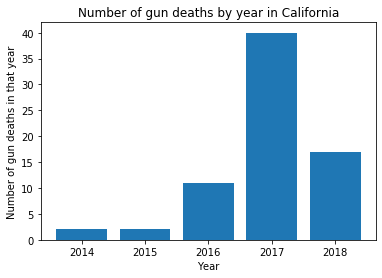

In [19]:
plt.bar(deaths_agg_by_year.keys(), deaths_agg_by_year.values())
plt.ylabel('Number of gun deaths in that year')
plt.xlabel('Year')
plt.title('Number of gun deaths by year in California')

$\textbf{Box Plot}$

But what if we wanted to know something more interesting about the data, like the gender distribution of the participants in gun crime?

To do that, we need to manipulate the data some more, and then think of a nice visualization to use. Any ideas?

In [20]:
gender = [re.findall(r"Male|Female", s) for s in dataset['participant_gender']]
gender
#using the participant_gender column, I clean and split the data using a regular expression to parse it.
#the result is below: for each entry, I have a clean list of the genders of the participants in each gun crime 
#in the dataset.

[['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
 ['Male', 'Male', 'Female', 'Female', 'Male'],
 ['Female', 'Female', 'Female', 'Female', 'Male'],
 ['Male', 'Male', 'Male', 'Male', 'Male'],
 ['Male',
  'Female',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male'],
 ['Female', 'Male'],
 ['Male', 'Male', 'Male', 'Male'],
 ['Male', 'Male'],
 ['Male', 'Female', 'Male'],
 ['Male', 'Male', 'Male'],
 ['Male', 'Male', 'Male', 'Male', 'Male'],
 ['Male', 'Male', 'Male'],
 ['Female', 'Male'],
 ['Male', 'Male'],
 ['Male', 'Male'],
 ['Female', 'Male'],
 ['Male', 'Male'],
 ['Male'],
 ['Male', 'Male', 'Male'],
 ['Female', 'Male'],
 ['Male', 'Male'],
 ['Male'],
 ['Female', 'Male'],
 ['Male', 'Male', 'Male'],
 ['Female', 'Male', 'Male'],
 ['Male', 'Male'],
 ['Male', 'Male'],
 ['Male', 'Male', 'Male'],
 ['Male', 'Male'],
 ['Female', 'Male'],
 ['Male',
  'Male',
  'Male',
  'Female',


In [21]:
num_male = [sum(1 for x in i if x == 'Male') for i in gender]
#number of males in each gun crime

In [22]:
num_female = [sum(1 for x in i if x == 'Female') for i in gender]
#number of females in each gun crime

Text(0.5, 1.0, 'A boxplot of the number of males involved in gun crimes in the dataset')

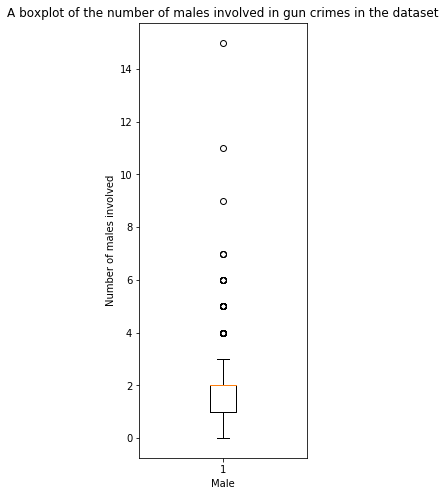

In [23]:
plt.figure(figsize = (3, 8))
plt.boxplot(num_male)
#sns.boxplot(data = num_male, notch = True)
plt.ylabel('Number of males involved')
plt.xlabel('Male')
plt.title('A boxplot of the number of males involved in gun crimes in the dataset')

Text(0.5, 1.0, 'A boxplot of the number of females involved in gun crimes in the dataset')

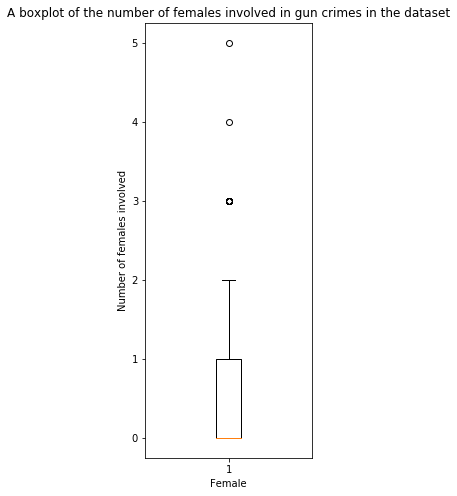

In [24]:
plt.figure(figsize = (3, 8))
plt.boxplot(num_female)
#sns.boxplot(data = num_female, notch = True)
plt.ylabel('Number of females involved')
plt.xlabel('Female')
plt.title('A boxplot of the number of females involved in gun crimes in the dataset')

What are some things that you can conclude with respect to gender from these boxplots?

$\textbf{Line Graph}$

In [25]:
#Let's say that we wanted to create a time series analysis of the data to see if there are any big spikes in crime
#on certain days. We suspect that some phenomena cause more deaths on certain days than others.

In [26]:
#What are some tools that we can use to achieve this?

In [27]:
time_grouping = dataset.groupby('date').agg({'n_killed': sum, 'n_injured': sum})

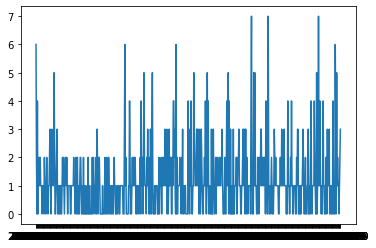

In [28]:
plt.plot(time_grouping.index, time_grouping['n_killed'])

What is wrong with this plot? How do we fix this?

Text(0.5, 1.0, 'The number of people killed by guns in a day over time')

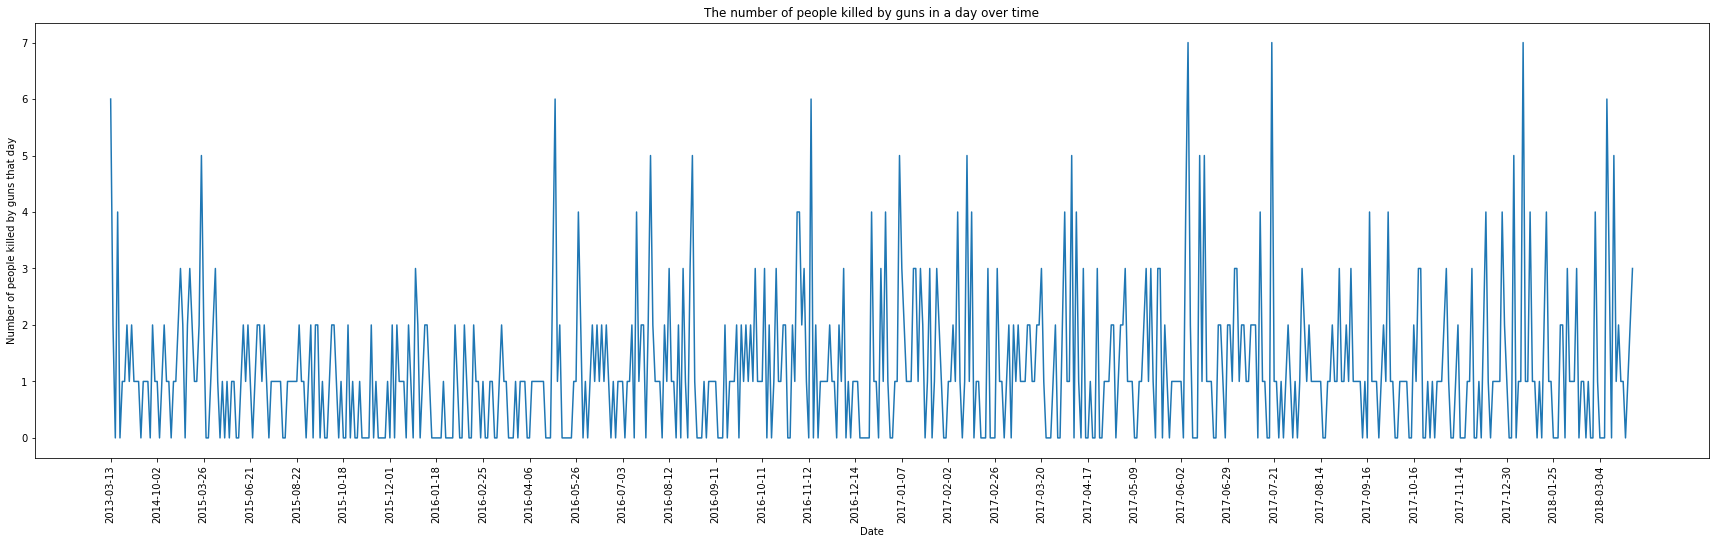

In [29]:
plt.figure(figsize = (30, 8))
ax = plt.plot(time_grouping.index, time_grouping['n_killed'])
plt.xticks(time_grouping.index[::20], time_grouping.index[::20], rotation = 'vertical')
#sns.lineplot(time_grouping.index, time_grouping['n_killed'])
plt.xlabel('Date')
plt.ylabel('Number of people killed by guns that day')
plt.title('The number of people killed by guns in a day over time')

$\textbf{Scatter Plot}$

In [30]:
points = [[dataset['n_killed'].iloc[i], dataset['n_injured'].iloc[i]] for i in range(len(dataset))]
#we create points where the number killed is on the x axis and the number injured is on the y axis

Text(0.5, 1.0, 'Scatter plot comparing the number of people killed and injured in each gun incident')

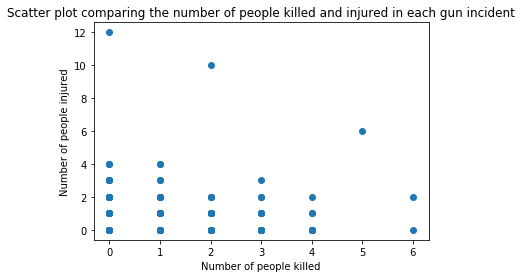

In [31]:
points_x = [points[i][0] for i in range(len(points))]
points_y = [points[x][1] for x in range(len(points))]
plt.scatter(points_x, points_y)
#sns.scatterplot(points_x, points_y)
plt.xlabel('Number of people killed')
plt.ylabel('Number of people injured')
plt.title('Scatter plot comparing the number of people killed and injured in each gun incident')

Does this scatter plot seem too good to be true? How is it possible that with so many points that we get a clean looking plot like this?

$\textbf{Violin Plot}$

C:\Users\EndlessWormhole\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'A violin plot of the number of people killed vs the number of people injured')

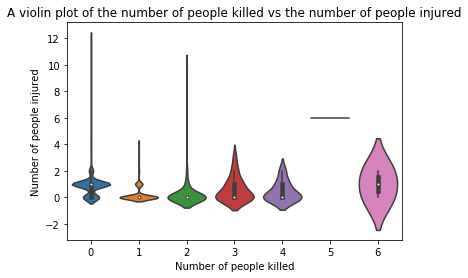

In [32]:
sns.violinplot(points_x, points_y, scale = "width")
plt.xlabel('Number of people killed')
plt.ylabel('Number of people injured')
plt.title('A violin plot of the number of people killed vs the number of people injured')

Compare this violin plot against the scatter plot of the same data above.

$\textbf{Contour Plot}$

Text(0.5, 1.0, 'Bivariate Kernel Density Estimate of the number of people killed vs number of people injured')

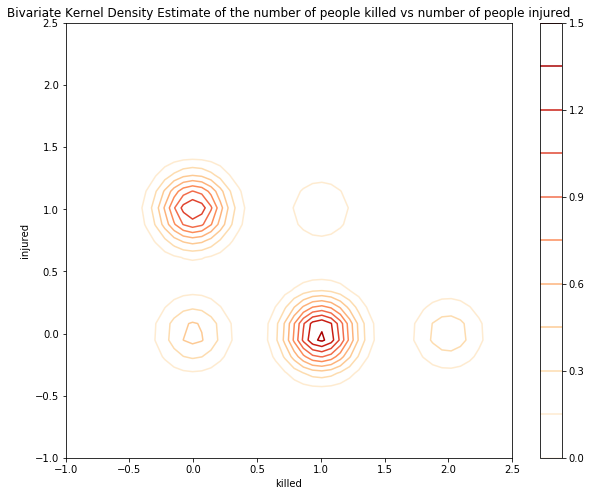

In [33]:
plt.figure(figsize = (10, 8))
sns.kdeplot(points_x, points_y, cbar = True, cmap="OrRd")
plt.xlim(-1, 2.5)
plt.ylim(-1, 2.5)
plt.ylabel('injured')
plt.xlabel('killed')
plt.title('Bivariate Kernel Density Estimate of the number of people killed vs number of people injured')

$\textbf{Heatmap}$

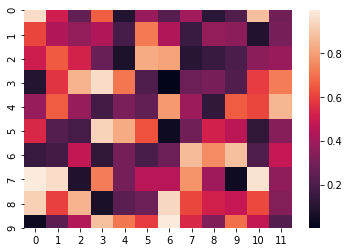

In [34]:
#the dataset is not "rectangularizable"
#i.e. each feature cannot be coherently represented as a matrix
#so to demonstrate the properties of the heatmap and how to create one, we will create random data.
ten_by_twelve = np.random.rand(10, 12)
#documentation for np.random.rand: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
#we're essentially creating a 10X12 matrix and populating it with data randomly sampled from a uniform(0,1) distribution.
ax = sns.heatmap(ten_by_twelve)

In [35]:
#as we can see, this is not a meaningful example

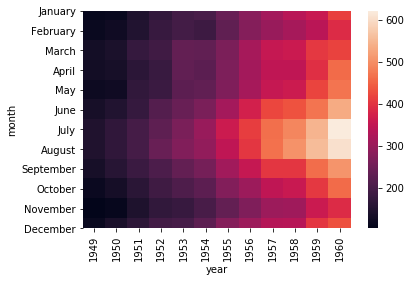

In [36]:
#sns has default datasets available for data analysis: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
#using these random datasets, we can create an example with meaning
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

$\textbf{Customization}$

In [37]:
#As you saw above, there was a decent amount of customization in the plots that we've created. 
#So how do you generally think about customization?

In [38]:
#notice: we can use matplotlib's customization properties to wrap around seaborn plots
#matplotlib allows you to customize matplotlib AND seaborn plots!

In [39]:
#setting x and y ticks manually
#Use plt.xticks and plt.yticks to set the location and labels on the x and y axes
#that's how we were able to reduce the number of dates being plotted above in the time series analysis.
#documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
#documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html

In [40]:
#color
#every plotting function will accept a color function: 
#either as a color map (for multiple plots on the same plot you need to specify different colors)
#or as an argument for a single plot on a plot (usually the c or color parameter which you pass a string to)
#here are some common colors that you can use: https://matplotlib.org/2.0.2/api/colors_api.html
#there are a large variety of different color mappings that you can specify: https://matplotlib.org/tutorials/colors/colormaps.html

In [41]:
#legends
#usually it's good practice that if you have multiple plots on the same plot, you should provide a legend
#to denote which plot is which
#documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
#takes usually two arguments: a list of handles, and a list of labels
#handles: these are the plot objects themselves
#labels: what do we want to label these plots as?

In [42]:
#there's a lot more that you can do to customize your plots than is listed here. 
#the best way to figure out customization schemes is to experiment yourself on given plots
#to ensure that you create the best looking plots possible.